In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_2_01_Nov_15_1548.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2
store.close()

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]
df_pass_all_strict_ma1Lt10 = df_pass_all_strict[df_pass_all_strict.ma1 <10]

In [5]:
# df_pass_all.head().T

In [6]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10:',len(df_pass_all_strict_ma1Lt10.index)

Original points (no constraints): 1150604
With relaxed constraints (on g-2, relic density & some LHC constraints): 611655
Strictly enforcing all constraints in NMSSMTools 4.8.2: 3312
Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10: 355


/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


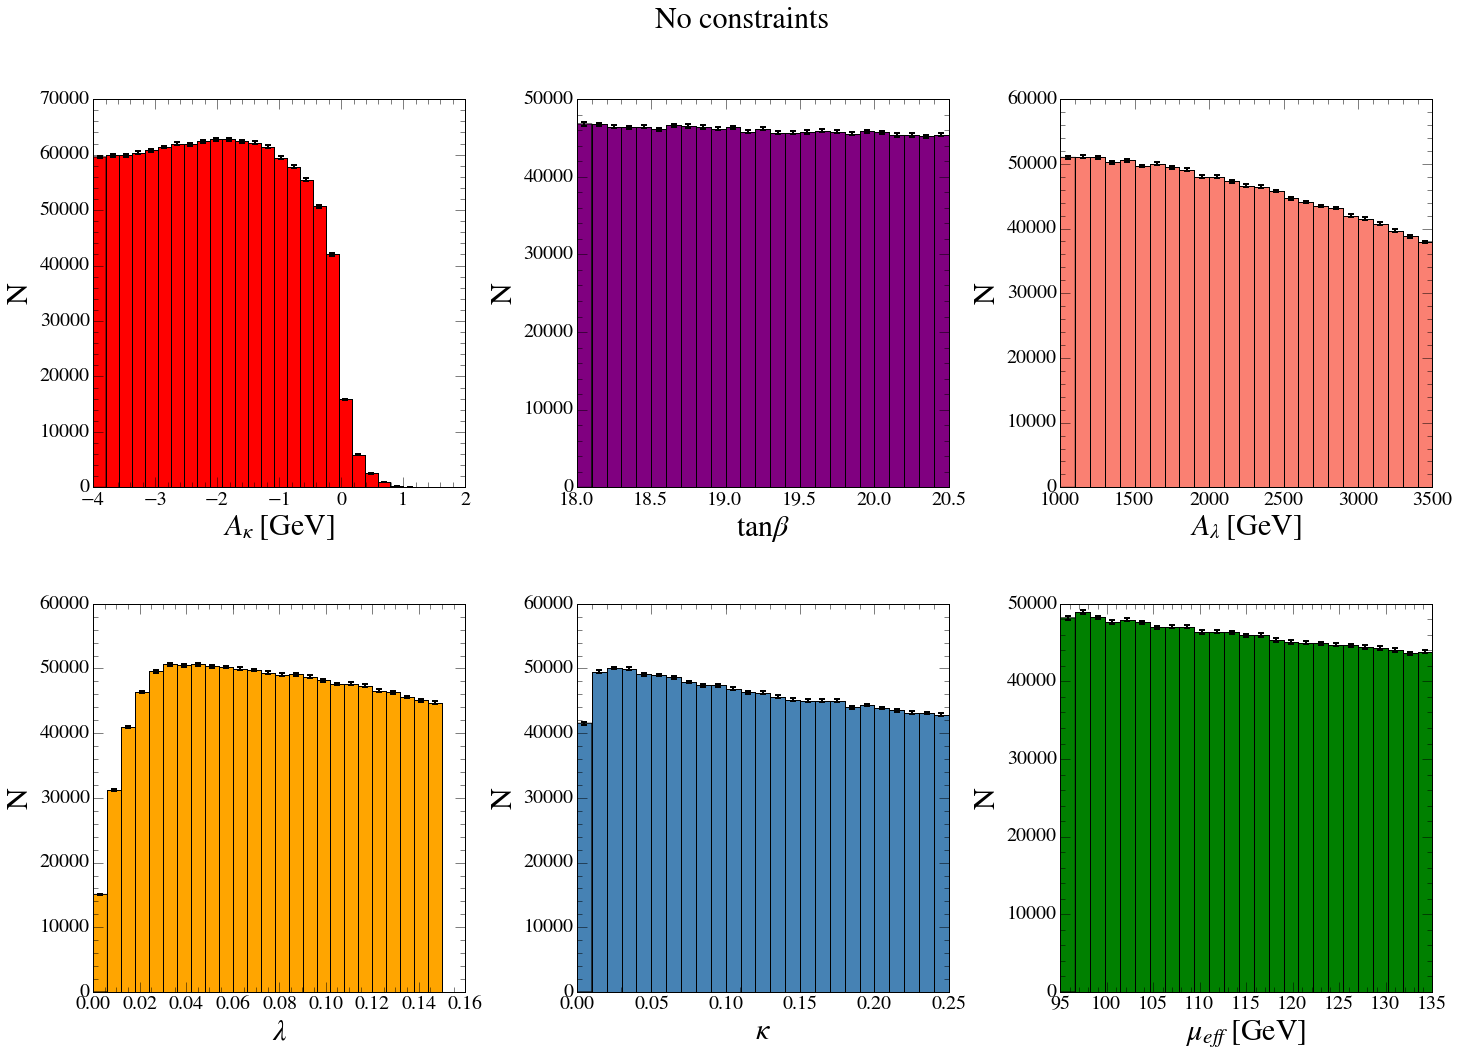

In [7]:
plot_input_params_hists(df_orig, "N", "No constraints", bins=25)

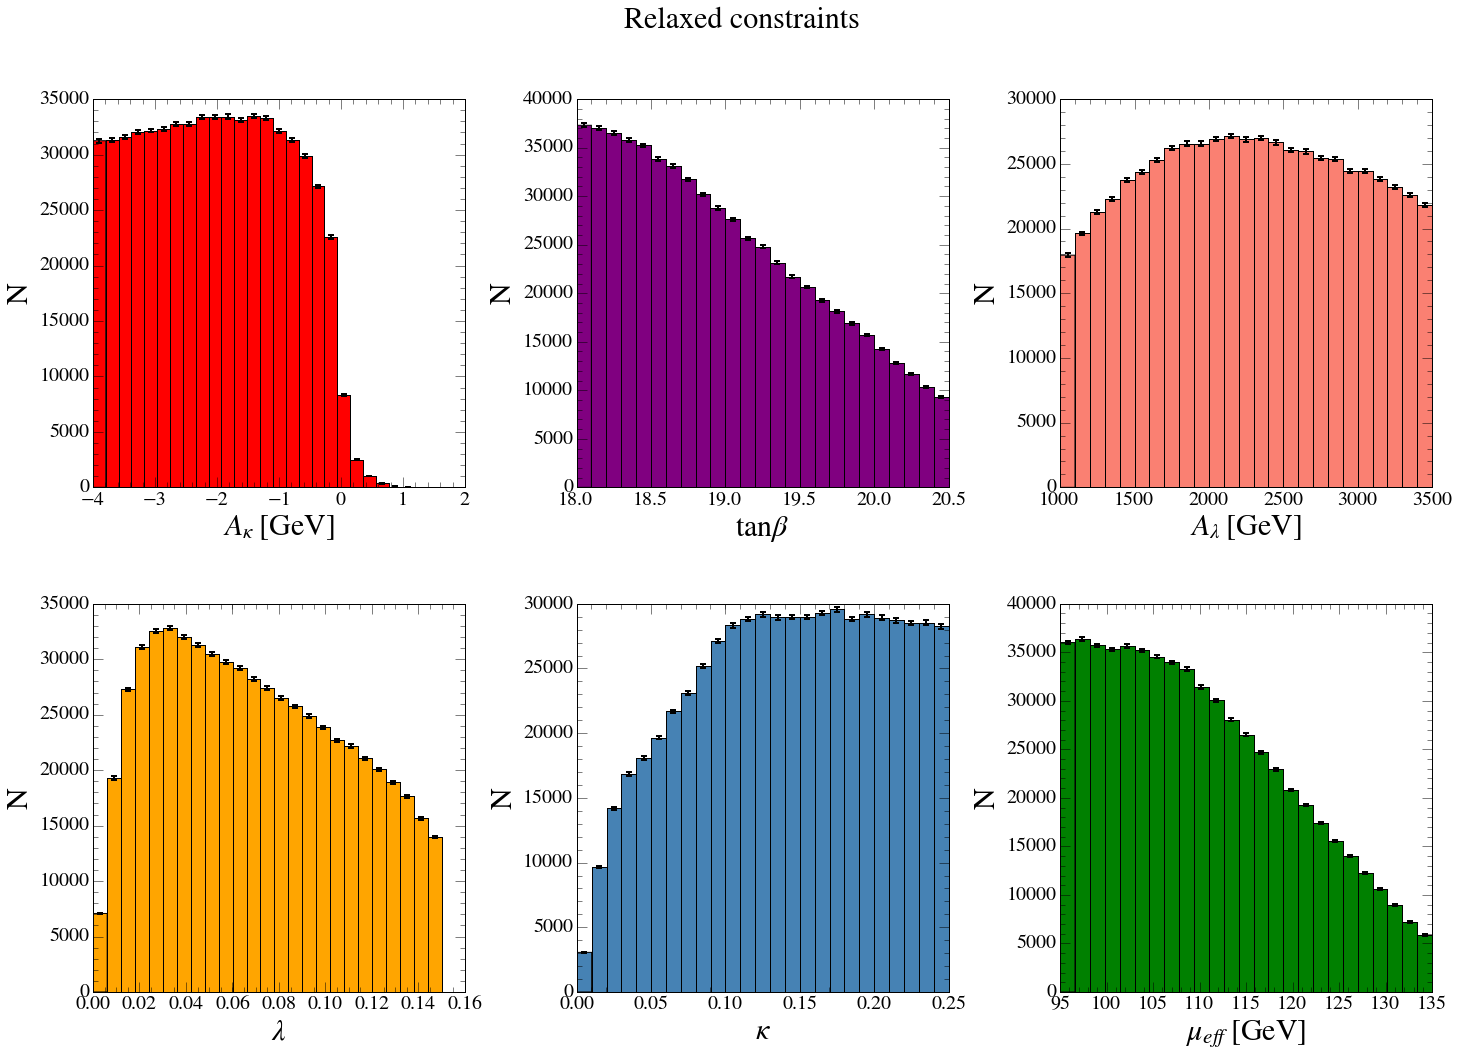

In [8]:
plot_input_params_hists(df_pass_all, "N", "Relaxed constraints", bins=25)

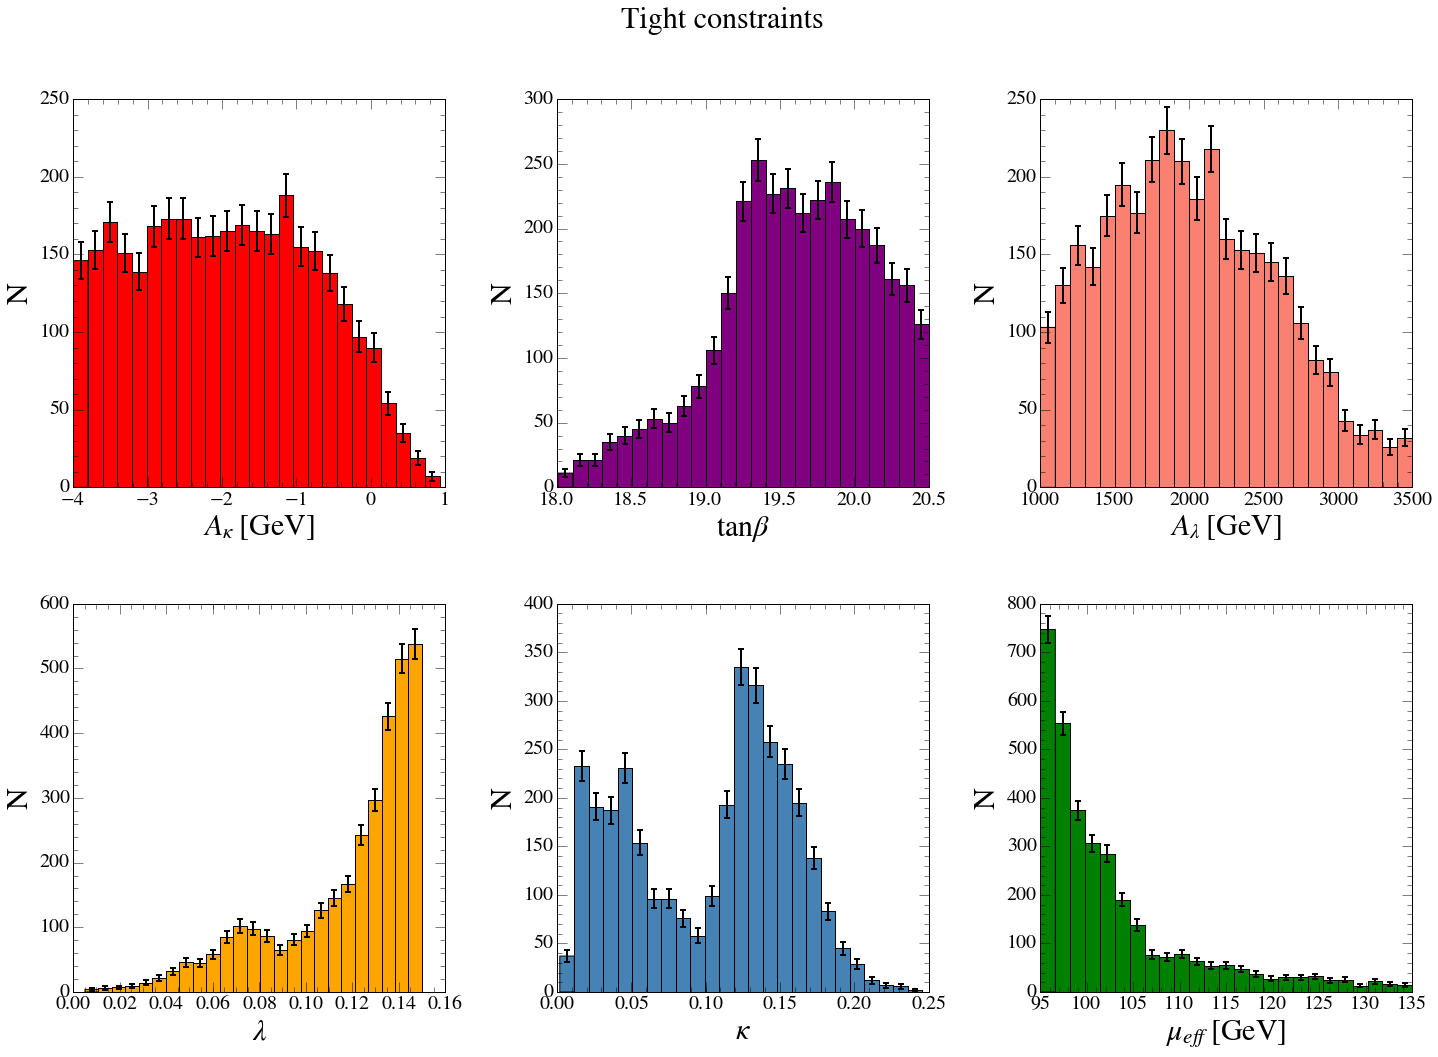

In [9]:
plot_input_params_hists(df_pass_all_strict, "N", "Tight constraints", bins=25)

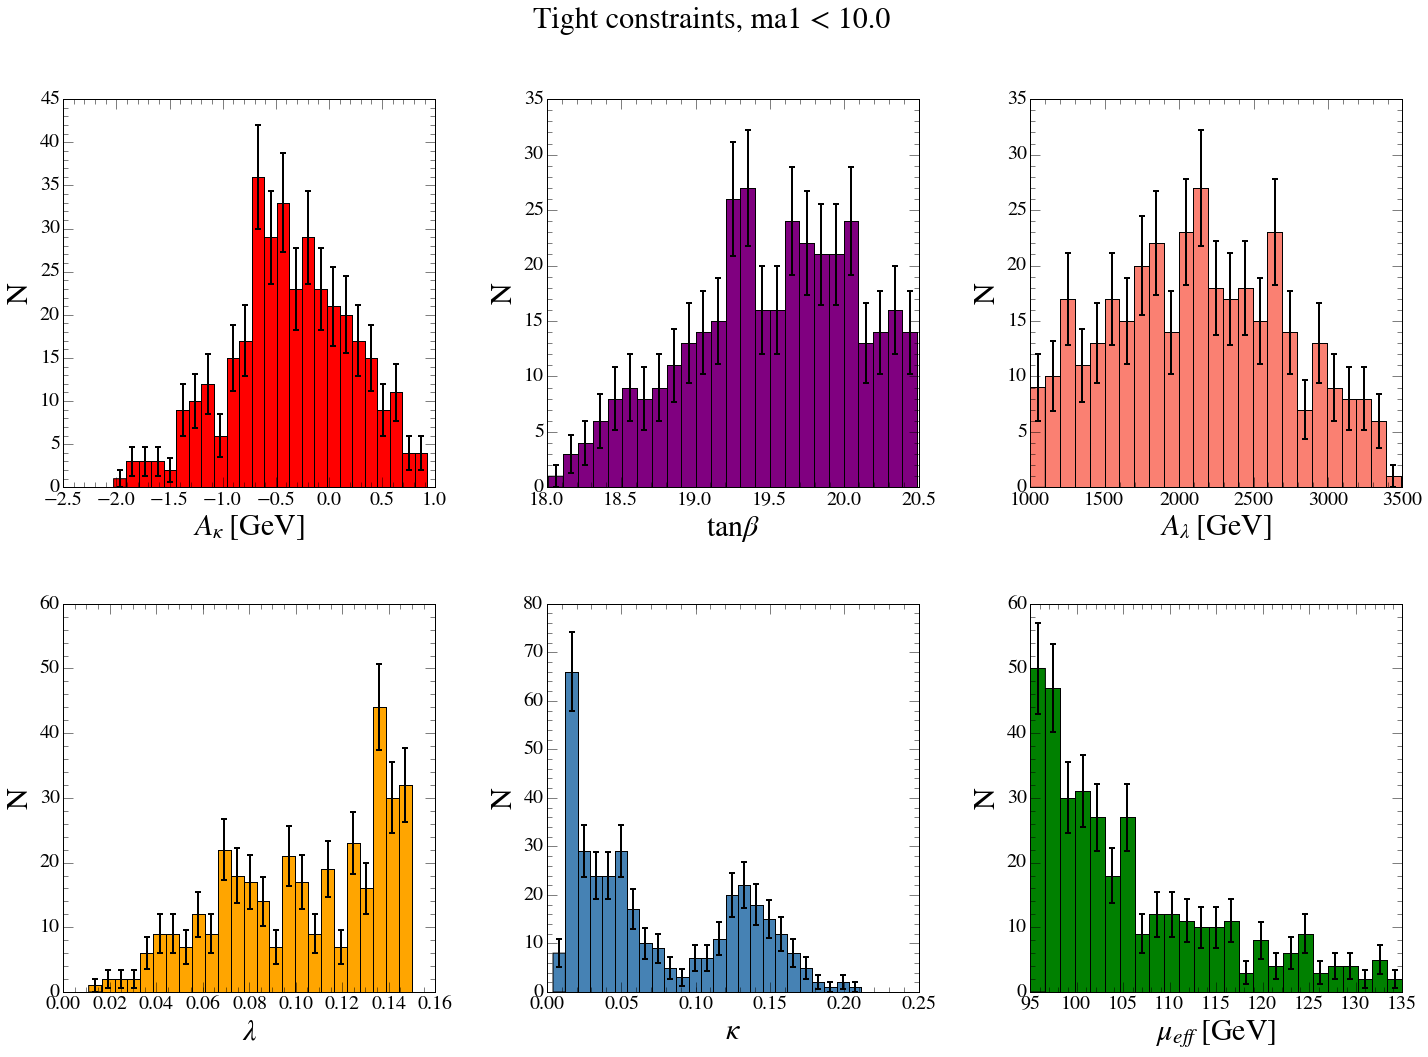

In [10]:
m = 10
plot_input_params_hists(df_pass_all_strict[df_pass_all_strict.ma1 < m], "N", "Tight constraints, ma1 < %.1f" % m, bins=25)

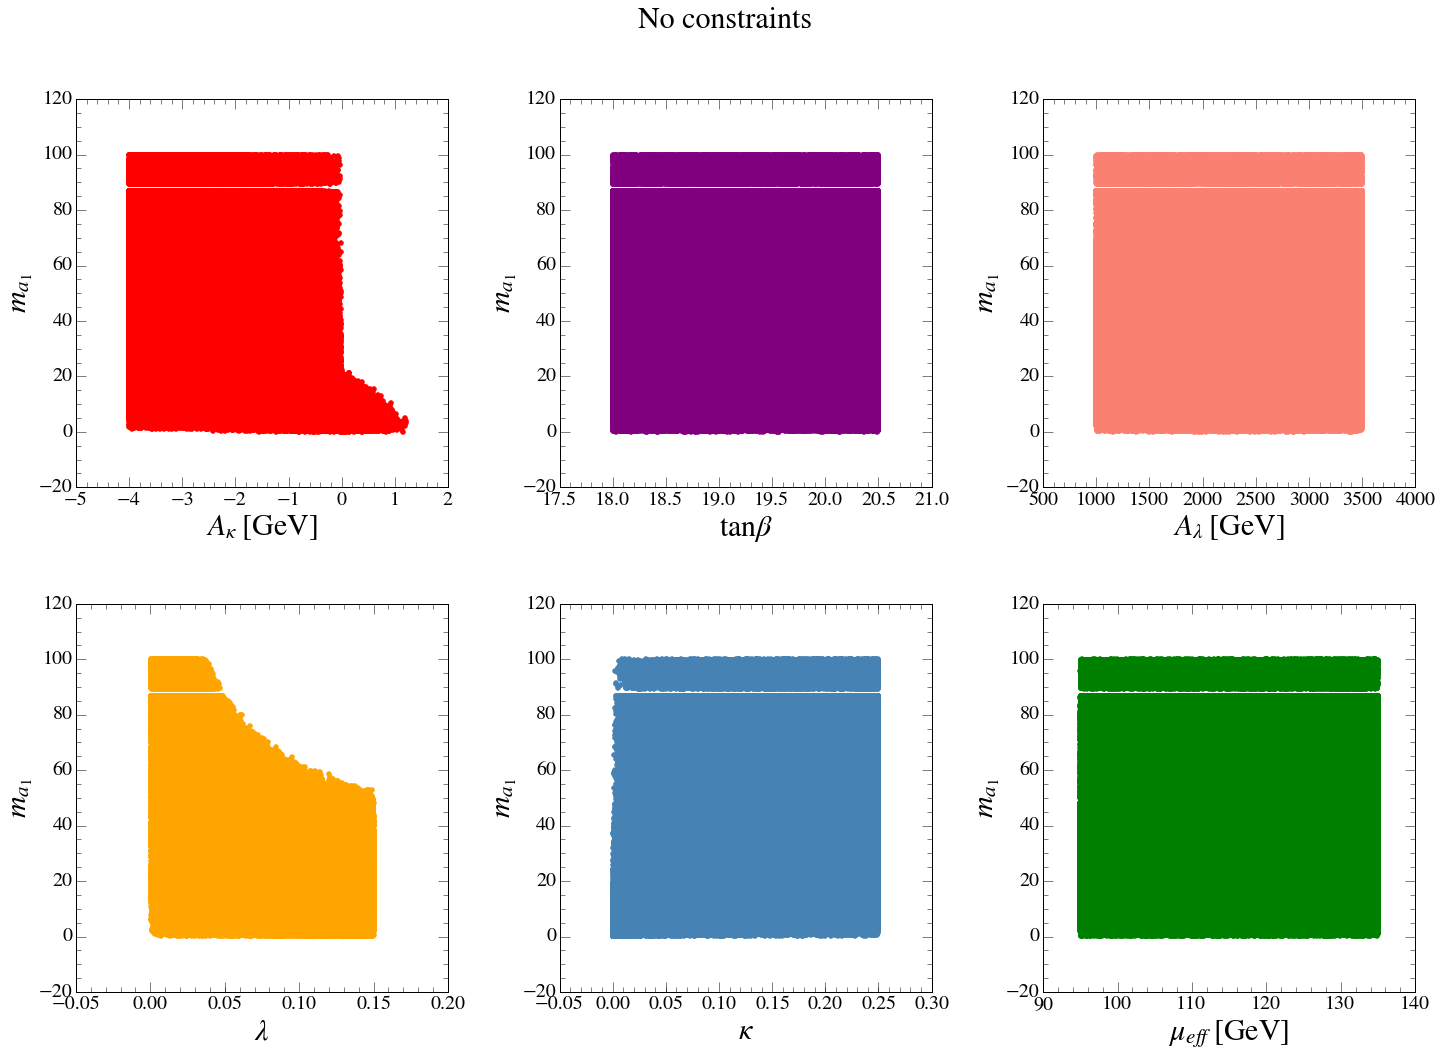

In [11]:
plot_input_params_scatters(df_orig, 'ma1', r"$m_{a_1}$", title="No constraints")

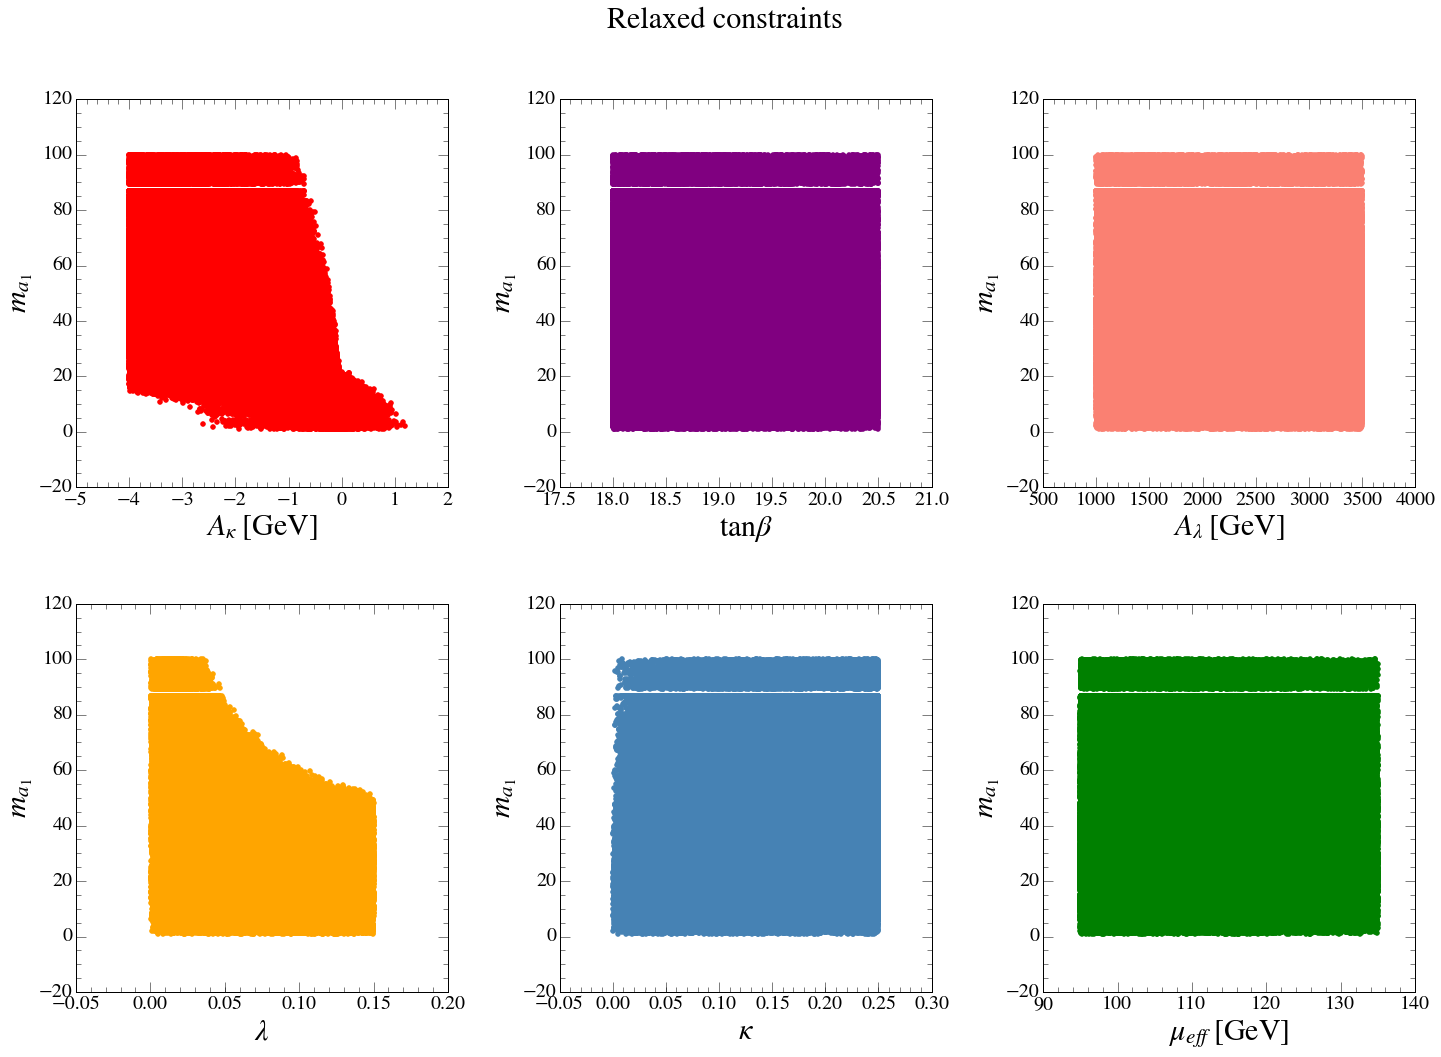

In [12]:
plot_input_params_scatters(df_pass_all, 'ma1', r"$m_{a_1}$", title="Relaxed constraints")

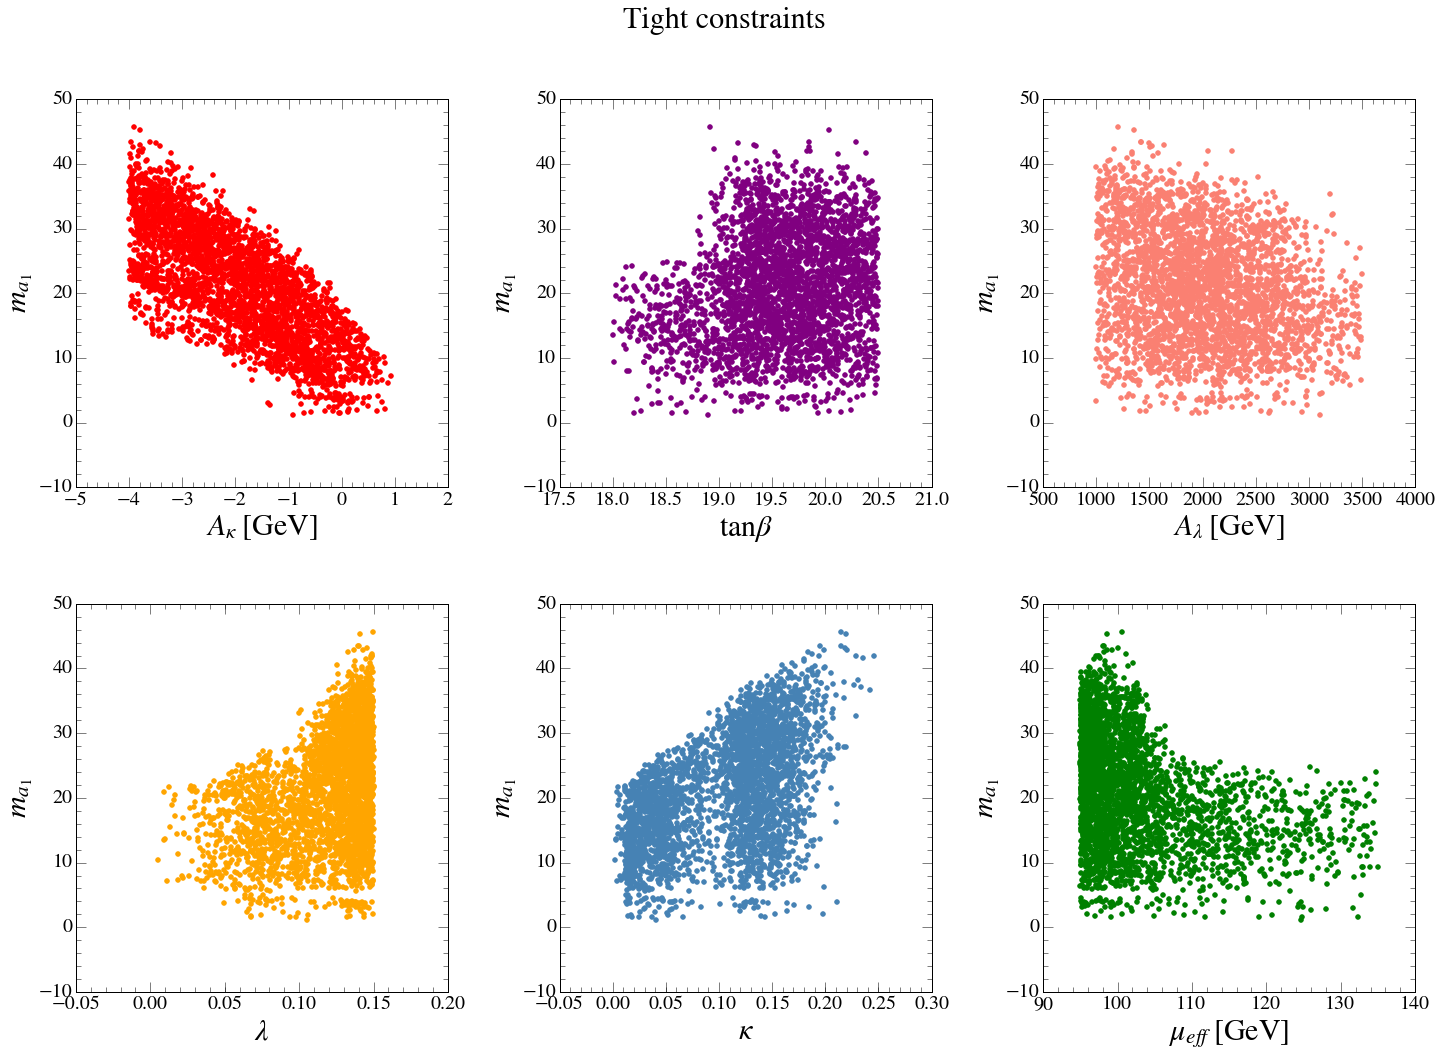

In [13]:
plot_input_params_scatters(df_pass_all_strict, 'ma1', r"$m_{a_1}$", title="Tight constraints")

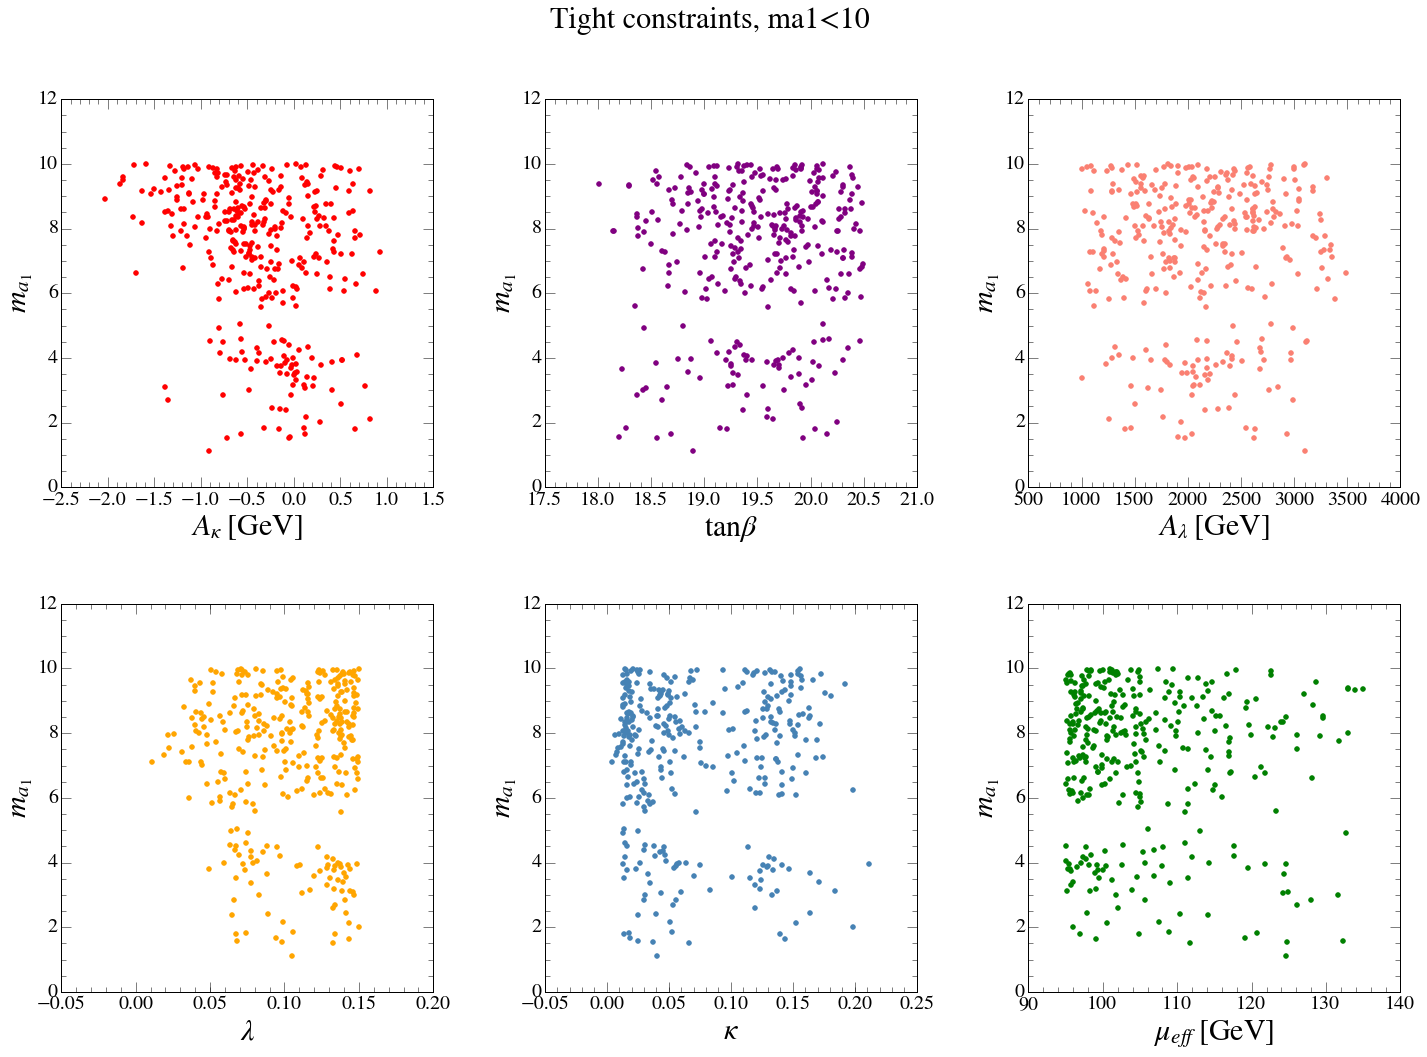

In [14]:
plot_input_params_scatters(df_pass_all_strict_ma1Lt10, 'ma1', r"$m_{a_1}$", title="Tight constraints, ma1<10")

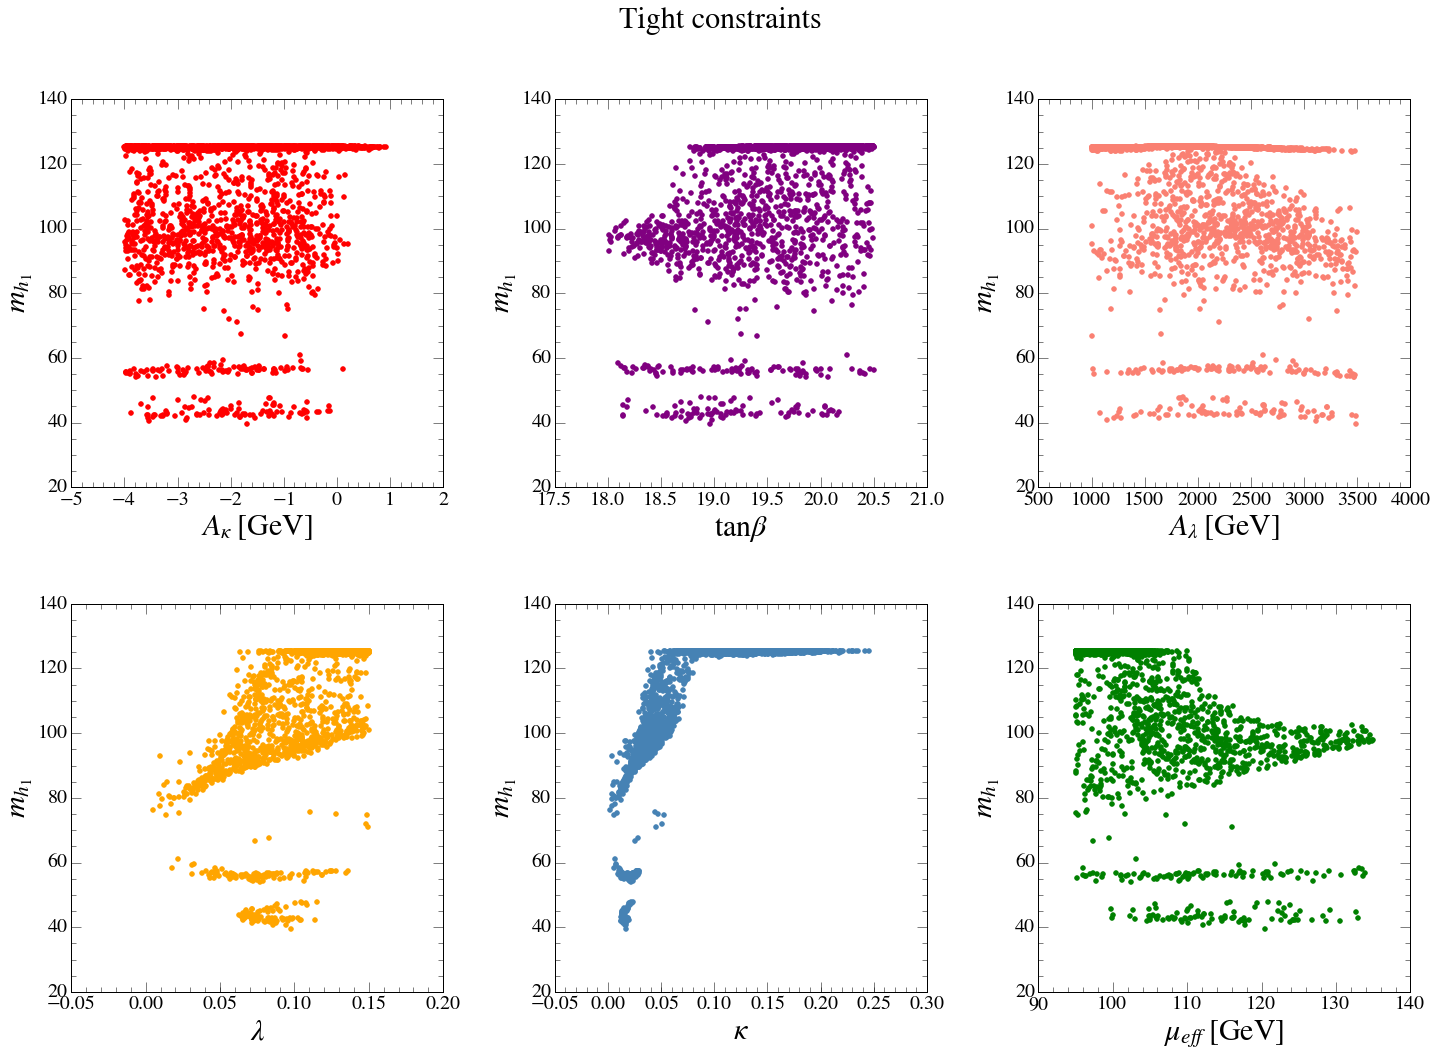

In [15]:
plot_input_params_scatters(df_pass_all_strict, 'mh1', r"$m_{h_1}$", title="Tight constraints")

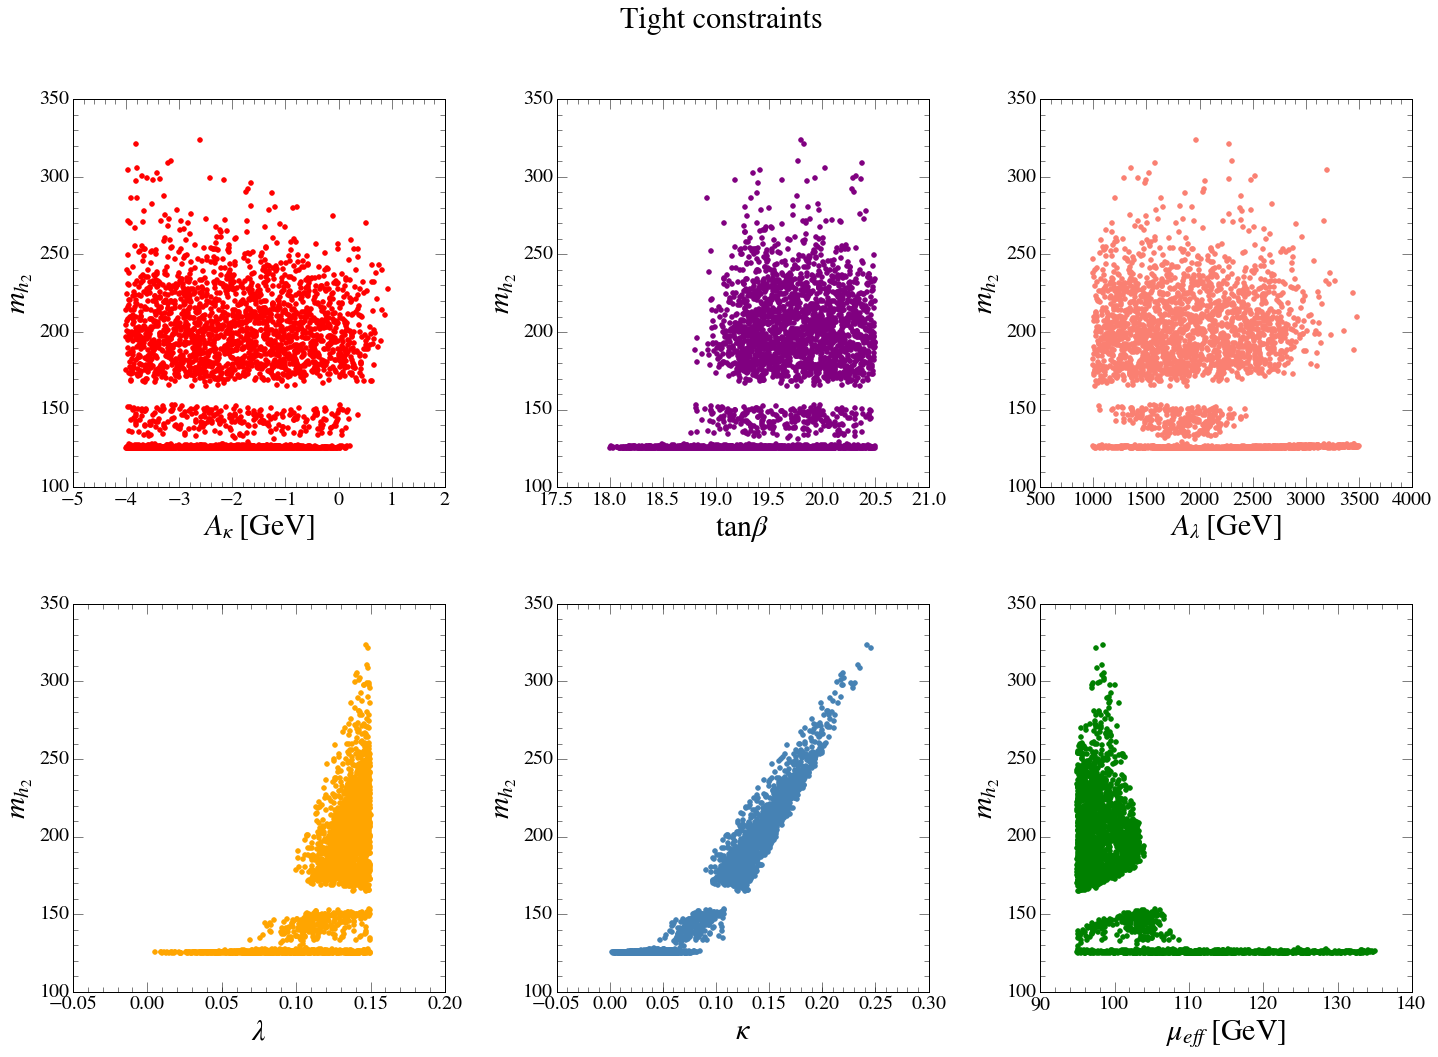

In [16]:
plot_input_params_scatters(df_pass_all_strict, 'mh2', r"$m_{h_2}$", title="Tight constraints")

(<matplotlib.axes._subplots.AxesSubplot at 0x16345dc10>,
 array([  0.,   0.,   1.,   9.,   6.,   4.,  12.,  24.,  11.,   6.,   1.,
          8.,  22.,  21.,  28.,  32.,  44.,  38.,  38.,  50.]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 <a list of 20 Patch objects>)

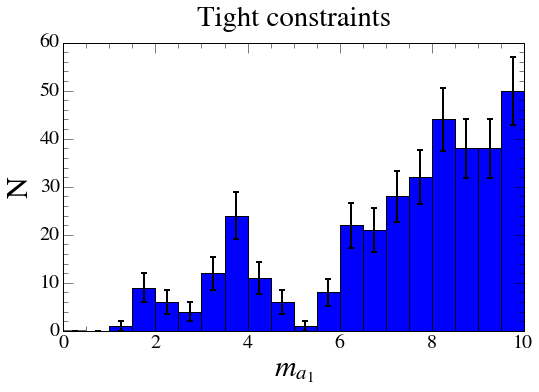

In [17]:
plot_histogram(var='ma1', df=df_pass_all_strict[df_pass_all_strict.ma1<10], 
               xlabel=r'$m_{a_1}$', ylabel='N', title='Tight constraints', bins=20, range=[0,10])

(<matplotlib.axes._subplots.AxesSubplot at 0x16341a550>,
 <matplotlib.collections.PathCollection at 0x1755a3990>)

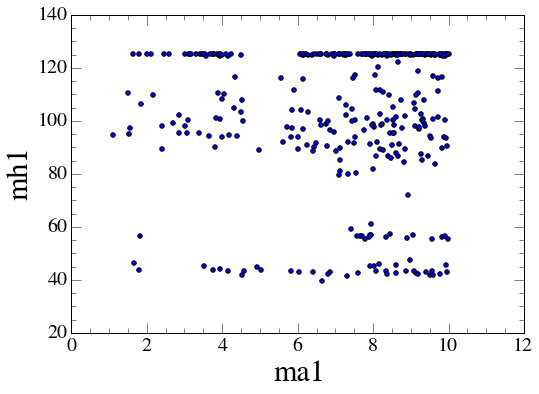

In [18]:
plot_scatter(xvar='ma1', yvar='mh1', df=df_pass_all_strict_ma1Lt10)

(<matplotlib.axes._subplots.AxesSubplot at 0x18112fb10>,
 <matplotlib.collections.PathCollection at 0x16c39e1d0>)

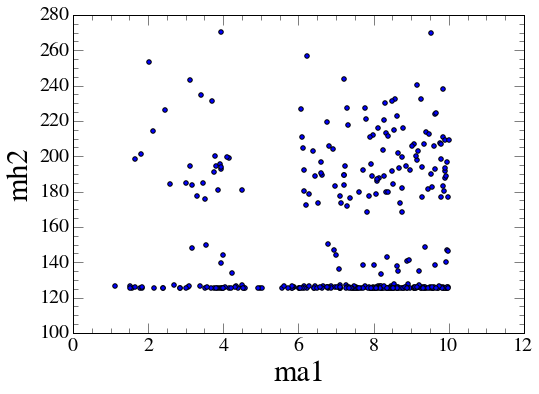

In [19]:
plot_scatter(xvar='ma1', yvar='mh2', df=df_pass_all_strict_ma1Lt10)

In [54]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h1_2a_4tau'] = df_pass_all_strict['xsec_ggf8_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau
df_pass_all_strict.loc[:, 'xsec_ggf13_h1_2a_4tau'] = df_pass_all_strict['xsec_ggf13_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau

In [48]:

df_pass_all_strict.loc[:, 'xsec_ggf8_h2_2a_4tau'] = df_pass_all_strict['xsec_ggf8_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau
df_pass_all_strict.loc[:, 'xsec_ggf13_h2_2a_4tau'] = df_pass_all_strict['xsec_ggf13_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau

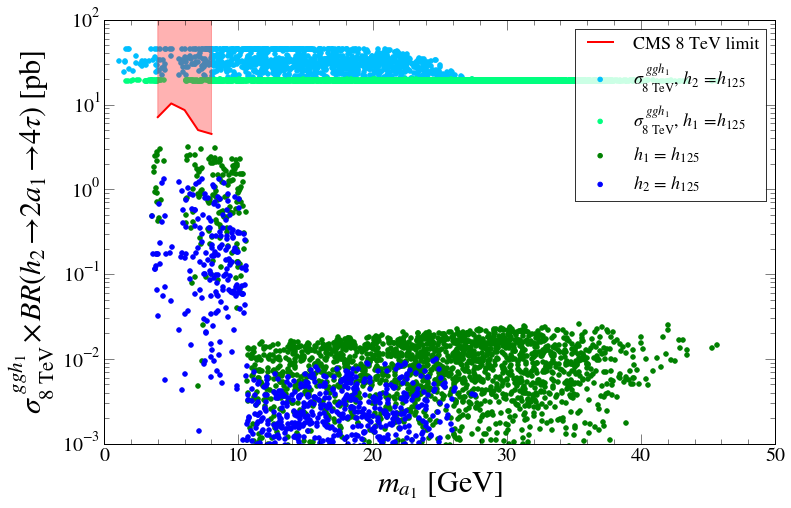

In [55]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             xvar='ma1', yvar='xsec_ggf8_h1', color='deepskyblue', 
             label=r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}},\ h_2 = h_{125}$', xlabel='ma1', ylabel='xsec*BR')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h1', color='springgreen', 
             label=r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}},\ h_1 = h_{125}$')

plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau',
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau', color='blue', label=r'$h_2 =\ h_{125}$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}} \times BR (h_2 \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.001, top=100)
plt.xlim(0, 50)
plot_cms_limit(color='red', linewidth=2)
plt.legend(fontsize=18, loc=0, framealpha=0.8)

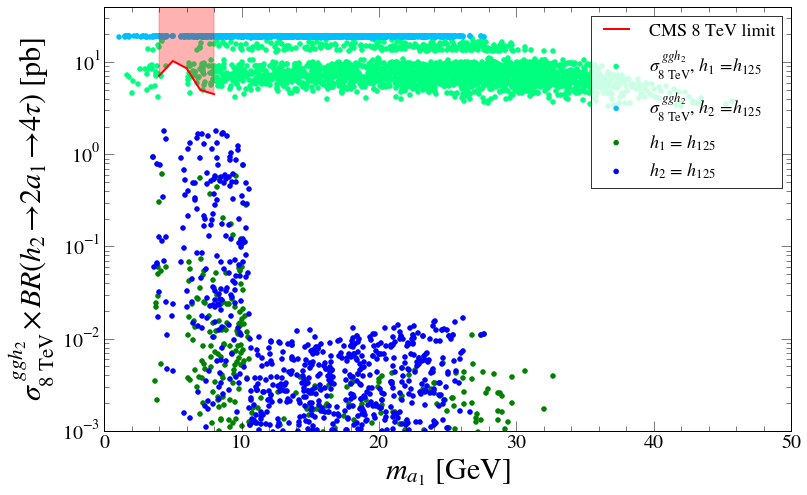

In [56]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
             xvar='ma1', yvar='xsec_ggf8_h2', color='springgreen', 
             label=r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}},\ h_1 = h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2', color='deepskyblue', 
             label=r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}},\ h_2 = h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', color='blue', label=r'$h_2 =\ h_{125}$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}} \times BR (h_2 \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.001, top=40)
plt.xlim(0, 50)
plot_cms_limit(color='red', linewidth=2)
plt.legend(fontsize=18, loc=0, framealpha=0.8)

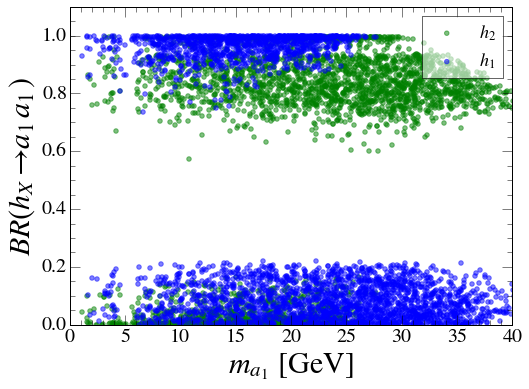

In [57]:
plot_scatter(xvar='ma1', yvar='Brh2a1a1', df=df_pass_all_strict, color='green', label=r'$h_2$', alpha=0.5)
plot_scatter(xvar='ma1', yvar='Brh1a1a1', df=df_pass_all_strict, ax=plt.gca(), color='blue', label=r'$h_1$', alpha=0.5)

plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.xlim(0, 40)
plt.ylabel(r'$BR(h_X \to a_1a_1)$')
plt.ylim(0, 1.1)
plt.legend(loc=0, fontsize=18)

(0.002, 2)

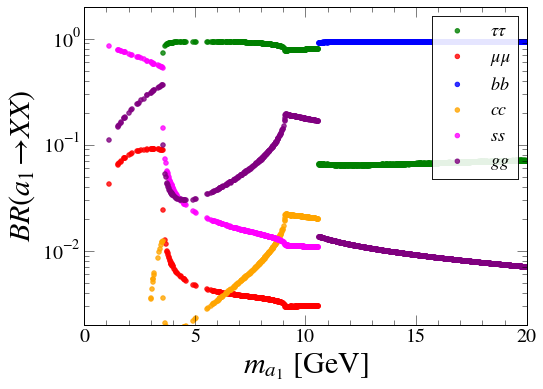

In [58]:
alp = 0.8
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df_pass_all_strict, color='green', label=r'$\tau\tau$', alpha=alp)
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df_pass_all_strict, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1bb', df=df_pass_all_strict, color='blue', label=r'$bb$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1cc', df=df_pass_all_strict, color='orange', label=r'$cc$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1ss', df=df_pass_all_strict, color='fuchsia', label=r'$ss$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1gg', df=df_pass_all_strict, color='purple', label=r'$gg$', alpha=alp, ax=plt.gca())

plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(0, 20)
plt.yscale('log')
plt.ylim(2E-3, 2)
# plt.ylim(0.9, 1)

## Aside: Testing ATLAS assumptions

### 1) To test the ATLAS assumption about $BR(a_1 \to \tau\tau)$ + $BR(a_1 \to \mu\mu)$ = 1: *FALSE*

(0.7, 1)

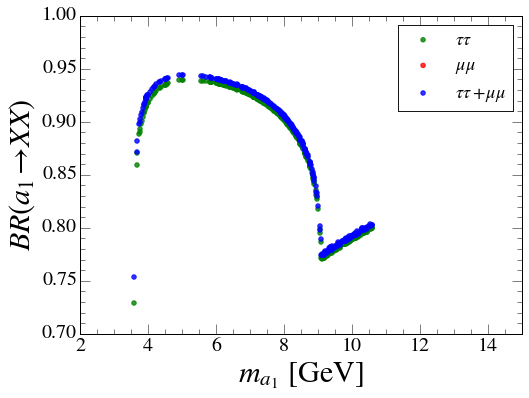

In [59]:
alp = 0.8
df_pass_all_strict.loc[:, 'Bra1tautauPlusMuMu'] = df_pass_all_strict['Bra1tautau'] + df_pass_all_strict['Bra1mumu']
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df_pass_all_strict, color='green', label=r'$\tau\tau$', alpha=alp)
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df_pass_all_strict, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1tautauPlusMuMu', df=df_pass_all_strict, color='blue', label=r'$\tau\tau + \mu\mu$', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 15)
# plt.yscale('log')
plt.ylim(7E-1, 1)

### 2) To test BR(a -> tautau) / BR(a -> mumu): *TRUE*

Paper claims:
\begin{equation}
\frac{\Gamma(a\to\mu\mu)}{\Gamma(a\to\tau\tau)} = \frac{m_{\mu}^2}{m_{\tau}^2\sqrt{1-(2m_{\tau}/m_{a})^2}}
\end{equation}

In [27]:
# As according to ATLAS
m_a = np.arange(2, 40, 0.25)
m_mu = 0.106
m_tau = 1.777
mumuOverTauTau = m_mu**2 / (m_tau**2 * np.sqrt(1 - (2*m_tau/m_a)**2))
print m_a.shape
print mumuOverTauTau.shape

(152,)
(152,)


(0.003, 0.01)

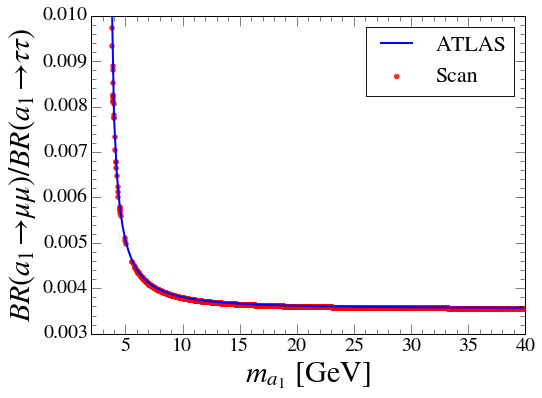

In [44]:
alp = 0.8
df_pass_all_strict.loc[:, 'Bra1MuMuOverTauTau'] =  df_pass_all_strict['Bra1mumu'] / df_pass_all_strict['Bra1tautau'] 
plot_scatter(xvar='ma1', yvar='Bra1MuMuOverTauTau', df=df_pass_all_strict, color='red', label='Scan', alpha=alp)
plt.plot(m_a, mumuOverTauTau, label=r'ATLAS', color='blue', linewidth=2)
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \mu\mu)/BR(a_1 \to \tau\tau)$')
plt.legend(loc=0, fontsize=22, framealpha=0.9)
plt.xlim(2, 40)
# plt.yscale('log')
plt.ylim(0.003, 0.01)

### 3) Values of BR(a -> tau tau), BR(a -> mumu): *Not Really True*

Using the formula above, and BR(tautatu) + BR(mumu) = 1:

\begin{equation}
\mathrm{Let}
\\
t \equiv BR(a \to \tau\tau)
\\
m \equiv BR(a \to \mu\mu)
\\
\mathrm{Then}
\\
t + m = 1
\\
m/t = k \to m = tk, t = m/k
\\
t = 1/(1+k)
\\
m = k/(1+k)
\end{equation}

In [29]:
Brtautau_atlas = 1 / (1 + mumuOverTauTau)
Brmumu_atlas = mumuOverTauTau / (1 + mumuOverTauTau)

(0, 1.1)

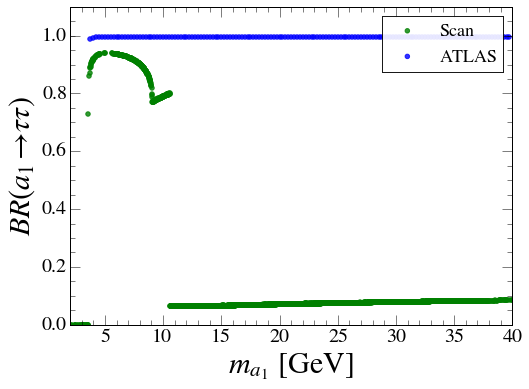

In [30]:
alp = 0.8
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df_pass_all_strict, color='green', label='Scan', alpha=alp)
plot_scatter(xarray=m_a, yarray=Brtautau_atlas, color='blue', label=r'ATLAS', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \tau\tau)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 40)
# plt.yscale('log')
plt.ylim(0, 1.1)

(0.0002, 0.02)

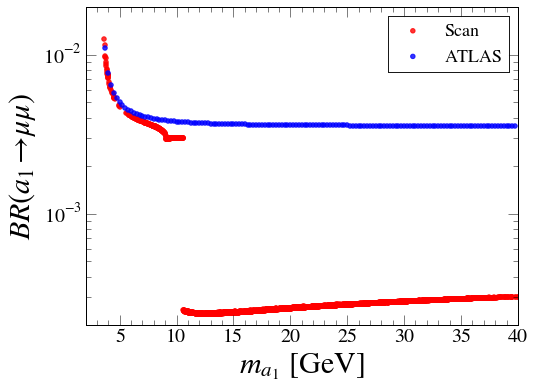

In [31]:
alp = 0.8
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df_pass_all_strict, color='red', label='Scan', alpha=alp)
plot_scatter(xarray=m_a, yarray=Brmumu_atlas, color='blue', label=r'ATLAS', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \mu\mu)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 40)
plt.yscale('log')
plt.ylim(0.0002, 0.02)
# plt.xscale('log')

## Back to normal service

(0, 30)

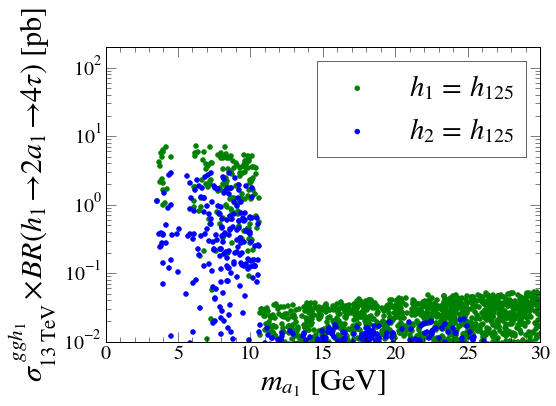

In [60]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h1_2a_4tau', ylabel=r'$\sigma \times BR\mathrm{ [pb]}$',
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h1_2a_4tau', color='blue', label=r'$h_2 =\ h_{125}$',
             xlabel=r'$m_{a_1} \mathrm{\ [GeV]}$', 
             ylabel=r'$\sigma^{ggh_1}_{\mathrm{13\ TeV}} \times BR (h_1 \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.legend()
plt.yscale('log')
plt.ylim(bottom=0.01, top=200)
plt.xlim(0, 30)

(0, 30)

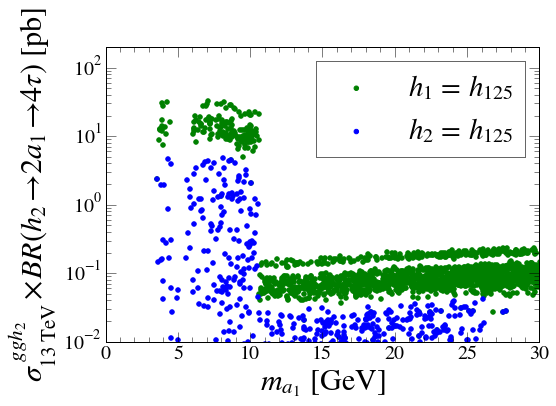

In [33]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h2_2a_4tau', ylabel=r'$\sigma \times BR\mathrm{ [pb]}$',
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h2_2a_4tau', color='blue', label=r'$h_2 =\ h_{125}$',
             xlabel=r'$m_{a_1} \mathrm{\ [GeV]}$', 
             ylabel=r'$\sigma^{ggh_2}_{\mathrm{13\ TeV}} \times BR (h_2 \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.legend()
plt.yscale('log')
plt.ylim(bottom=0.01, top=200)
plt.xlim(0, 30)

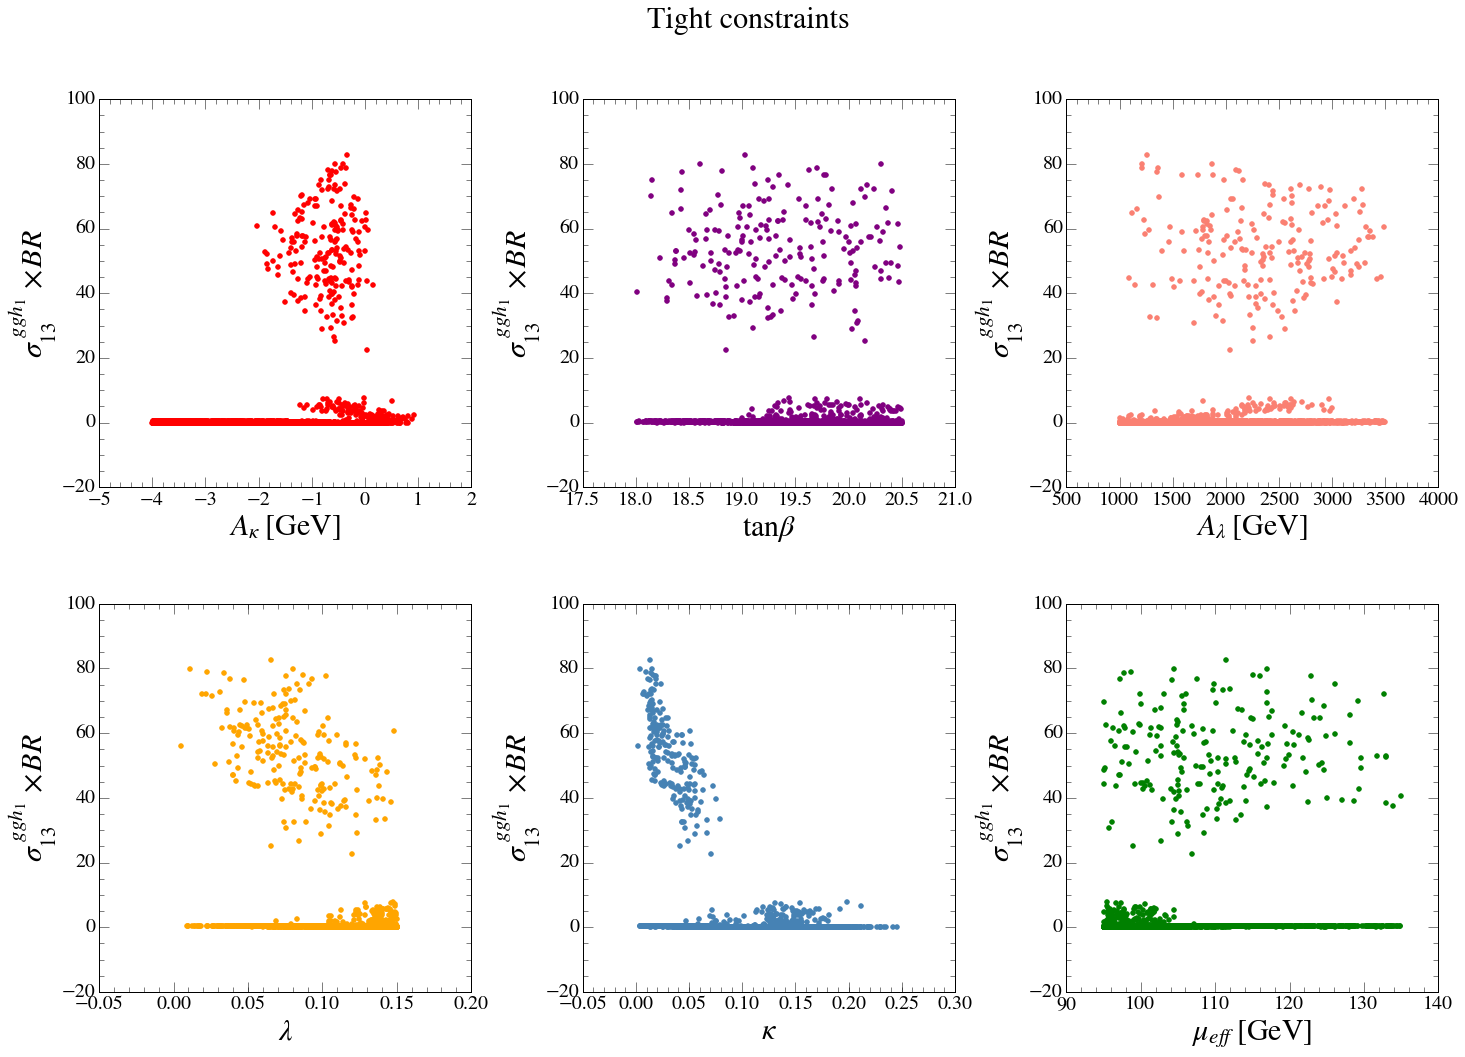

In [34]:
plot_input_params_scatters(df_pass_all_strict, 'xsec_ggf13_h1_2a_4tau', r"$\sigma^{ggh_1}_{13} \times BR$", title="Tight constraints")

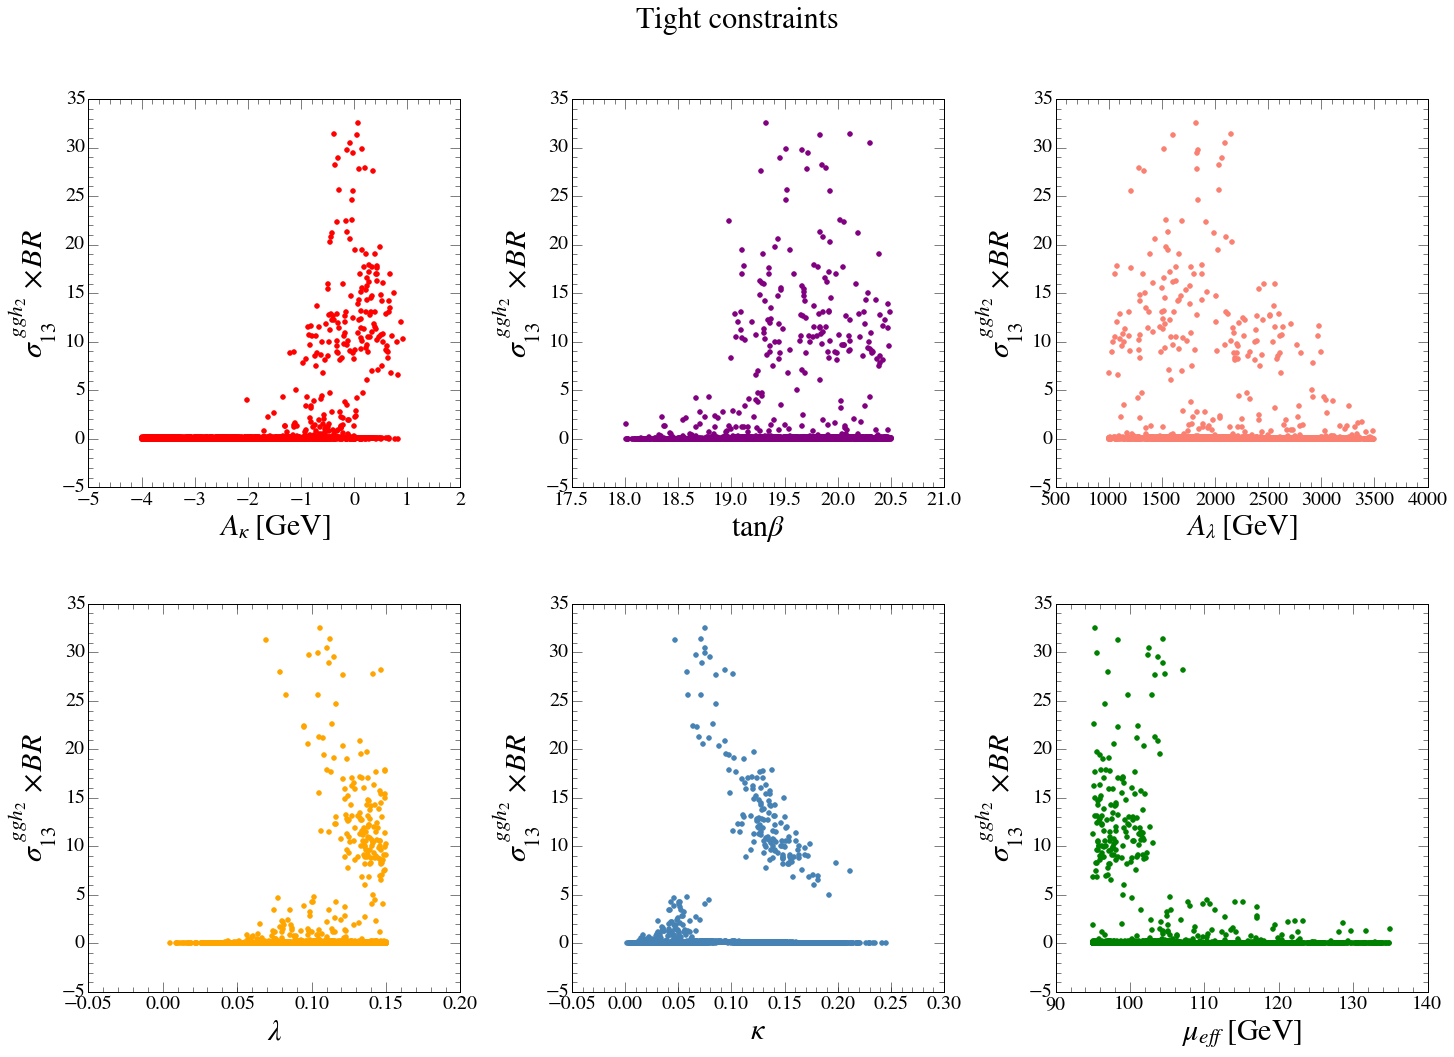

In [35]:
plot_input_params_scatters(df_pass_all_strict, 'xsec_ggf13_h2_2a_4tau', r"$\sigma^{ggh_2}_{13} \times BR$", title="Tight constraints")